In [111]:
import pandas as pd

# Inegi

In [112]:
inegi = pd.read_csv('inegi.csv')

In [113]:
inegi['entidad'] = inegi['entidad'].apply(lambda x: 'YUCATAN' if 'YUCA' in x else x)
yinegi = inegi[inegi['entidad']=='YUCATAN']
yinegi.head()

,nom_estab,nombre_act,per_ocu,entidad,municipio,localidad,www,tipoUniEco,latitud,longitud,fecha_alta
152158,100 ARRACHERO,Restaurantes con servicio de preparación de ta...,6 a 10 personas,YUCATAN,Mérida,Mérida,NaN,Fijo,21.001433,-89.605708,2010-07-01
152159,100 MONTADITOS,Restaurantes con servicio de preparación de al...,11 a 30 personas,YUCATAN,Mérida,Mérida,NaN,Fijo,21.038795,-89.601918,2019-11-01
152160,100 NATURAL,"Cafeterías, fuentes de sodas, neverías, refres...",11 a 30 personas,YUCATAN,Mérida,Mérida,NaN,Fijo,21.024276,-89.624382,2010-07-01
152161,100 NATURAL RESTAURANTES,Restaurantes con servicio de preparación de al...,11 a 30 personas,YUCATAN,Mérida,Mérida,WWW.100NATURAL.COM,Fijo,21.020646,-89.585322,2014-12-01
152162,100 PIZZAS,Restaurantes con servicio de preparación de pi...,11 a 30 personas,YUCATAN,Mérida,Mérida,NaN,Fijo,20.998787,-89.566374,2019-11-01


In [17]:
yinegi['localidad'].value_counts()

Mérida              6208
Kanasín              546
Valladolid           461
Tizimín              430
Ticul                426
                    ... 
Xmatkuil [Feria]       1
Uxmal [Ruinas]         1
Mi Rancho              1
Sáamal                 1
San Benito             1
Name: localidad, Length: 134, dtype: int64

In [18]:
yinegi.drop(yinegi[yinegi['localidad']!='Mérida'].index, inplace=True)
yinegi['localidad'].value_counts()

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Mérida    6208
Name: localidad, dtype: int64

In [19]:
yinegi['nom_estab'].value_counts()

COCINA ECONÓMICA SIN NOMBRE                 96
COCINA ECONÓMICA                            93
VENTA DE ANTOJITOS                          75
VENTA DE ANTOJITOS SIN NOMBRE               65
LONCHERÍA SIN NOMBRE                        46
                                            ..
HABBIS PIZZA                                 1
COOL DE SAC                                  1
MARISQUERIA SNAK BAR EL CAMARÓN DE LA 60     1
POLLOS ASADOS RODRY                          1
TAMALES HORNEADOS                            1
Name: nom_estab, Length: 4755, dtype: int64

## Extracting main food types

In [20]:
import re

def clean_up(s):
    """
    Cleans up numbers, URLs, and special characters from a string.

    Args:
        s: The string to be cleaned up.

    Returns:
        A string that has been cleaned up.
    """
    res = re.sub('[0-9]+', '', s).lower()
    res = re.sub('http://\w+\.\w+', '', res)
    
    for letter in res:
        if not letter.isalpha() and letter != ' ':
            res = res.replace(letter,' ')
            
    #res = re.sub('http', '', res)
    return res.strip()

In [21]:
from nltk.tokenize import word_tokenize

def tokenize(s):
    """
    Tokenize a string.

    Args:
        s: String to be tokenized.

    Returns:
        A list of words as the result of tokenization.
    """
    return word_tokenize(s)

In [22]:
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
#print(" ".join(SnowballStemmer.languages))

def stem_and_lemmatize(l):
    """
    Perform stemming and lemmatization on a list of words.

    Args:
        l: A list of strings.

    Returns:
        A list of strings after being stemmed and lemmatized.
    """
    stemmer = SnowballStemmer('spanish')
    lemmatizer = WordNetLemmatizer()
    
    res = []
    for word in l:
        stem_word = stemmer.stem(word) 
        res.append(lemmatizer.lemmatize(stem_word))
        
    return res

In [23]:
from nltk.corpus import stopwords

def remove_stopwords(l):
    """
    Remove English stopwords from a list of strings.

    Args:
        l: A list of strings.

    Returns:
        A list of strings after stop words are removed.
    """
    stopWords = set(stopwords.words('spanish'))
    return [w for w in l if w not in stopWords]

In [24]:
def prepareText(text):
    cleaned = clean_up(text)
    tokenized = tokenize(cleaned)
    sl_ized = stem_and_lemmatize(tokenized)
    return remove_stopwords(sl_ized)

In [25]:
import multiprocessing as mp

pool = mp.Pool(processes=(mp.cpu_count()-1))

yinegi['nom_processed'] = pool.map(prepareText, yinegi.nom_estab)
yinegi.head()

/home/linuxbrew/.linuxbrew/Cellar/jupyterlab/1.2.4/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,nom_estab,nombre_act,per_ocu,entidad,municipio,localidad,www,tipoUniEco,latitud,longitud,fecha_alta,nom_processed
152158,100 ARRACHERO,Restaurantes con servicio de preparación de ta...,6 a 10 personas,YUCATAN,Mérida,Mérida,NaN,Fijo,21.001433,-89.605708,2010-07-01,[arracher]
152159,100 MONTADITOS,Restaurantes con servicio de preparación de al...,11 a 30 personas,YUCATAN,Mérida,Mérida,NaN,Fijo,21.038795,-89.601918,2019-11-01,[montadit]
152161,100 NATURAL RESTAURANTES,Restaurantes con servicio de preparación de al...,11 a 30 personas,YUCATAN,Mérida,Mérida,WWW.100NATURAL.COM,Fijo,21.020646,-89.585322,2014-12-01,"[natural, restaur]"
152162,100 PIZZAS,Restaurantes con servicio de preparación de pi...,11 a 30 personas,YUCATAN,Mérida,Mérida,NaN,Fijo,20.998787,-89.566374,2019-11-01,[pizz]
152163,100% ARRACHERA EXPRESS,Restaurantes con servicio de preparación de ta...,0 a 5 personas,YUCATAN,Mérida,Mérida,NaN,Fijo,20.995639,-89.648207,2019-11-01,"[arracher, express]"


In [26]:
yinegi['tipo'] = yinegi.nom_processed.apply(lambda x: ' '.join(x))

pd.set_option('display.max_rows', None)
yinegi.tipo.value_counts()

/home/linuxbrew/.linuxbrew/Cellar/jupyterlab/1.2.4/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


cocin econom nombr                                                           97
cocin econom                                                                 95
vent antojit                                                                 79
vent antojit nombr                                                           71
lonch nombr                                                                  46
vent panuch salbut                                                           44
lonch                                                                        36
vent com nombr                                                               31
antojit nombr                                                                30
vent panuch                                                                  30
vent cochinit                                                                28
antojit                                                                      27
vent panuch nombr                       

In [27]:
tipos = ['cocin', 'com', 'caser', 'antojit', 'lonch', 'panuch', 'cochinit', 'lechon', 'tamal', 'poll', 'desay', 'pizz', 'tort', 
         'burg', 'taqu', 'tac', 'carne', 'asad', 'carnit', 'mondong', 'empan', 'hot dog', 'hotdog', 'fritang', 'pesc', 'marisc', 'marisq',
         'chicharr', 'gordit', 'cevich', 'costill', 'asader', 'grill', 'carnit', 'sush', 'doradit', 'baguet', 'parrill', 'birr', 'pozole',
         'huarach', 'rosti', 'china', 'chinesse', 'yuca', 'tabas', 'vaporc', 'arracher', 'restaur', 'barbaco', 'pastor']

def getTokenType(text):
    token_type = []
    for tipo in tipos:
        if tipo in text:
            token_type.append(tipo)
            
    return token_type
#for tipo in tipos:
#    yinegi.tipo = yinegi.tipo.apply(lambda x: tipo if tipo in x else x)
 
yinegi.tipo = yinegi.tipo.apply(getTokenType)

yinegi.tipo.value_counts()

/home/linuxbrew/.linuxbrew/opt/python/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


[]                                             1148
[cocin]                                        1069
[lonch]                                         479
[taqu]                                          458
[antojit]                                       435
[restaur]                                       316
[pizz]                                          278
[panuch]                                        169
[com]                                           160
[poll]                                          115
[tort]                                          105
[burg]                                          103
[cochinit]                                       90
[tac]                                            84
[tamal]                                          77
[poll, asad]                                     74
[pesc]                                           70
[chicharr]                                       69
[desay]                                          65
[tort, tac] 

In [28]:
foods = {
    'Cocina Económica': ['cocin', 'com', 'caser'],
    'Antojitos': ['antojit', 'lonch', 'cenaduria', 'fritang'],
    'Pizza': ['pizz'],
    'Hamburguesas': ['burg'],
    'Hot Dogs': ['hot dog', 'hotdogs'],
    'Sushi': ['sush'],
    'Tamales': ['tamal', 'vaporc'],
    'Mariscos': ['marisc', 'marisq', 'cevich'],
    'Pescado': ['pesc'],
    'Tacos': ['tac', 'taqu'],
    'Carne': ['carne'],
    'Asada': ['asader', 'asad'],
    'Panuchos': ['panuch', 'salbut'],
    'Cochinita': ['cochinit', 'lechon'],
    'Pollo': ['poll'],
    'Desayunos': ['desay'],
    'Tortas': ['tort'],
    'Mondongo': ['mondong'],
    'Empanadas': ['empan'],
    'Chicharronería': ['chicharr'],
    'Gorditas': ['gordit'],
    'Costillas': ['costill'],
    'Grill': ['grill'],
    'Carnitas': ['carnit'],
    'Doraditas': ['doradit'],
    'Baguettes': ['baguet', 'deli'],
    'Parrilla': ['parrill'],
    'Huaraches': ['huarach'],
    'Rosticería': ['rost'],
    'China': ['china', 'chinesse'],
    'Yucateca': ['yuca'],
    'Tabasqueña': ['tabas'],
    'Arrachera': ['arracher'],
    'Pastor': ['pastor'],
    'Birria': ['birr'],
    'Barbacoa': ['barbac'],
    'Pozole': ['pozole']
}

In [29]:
# NOT USED
def formatType(text):
    if 'restaur' in text:
        if ' ' in text:
            text = text.replace('restaur', '').strip()
        else:
            return 'Restaurante'
        
    for key in food:
        for word in food[key]:
            if word in text:
                text = text.replace(word, key)
                
    return ' '.join(list(set(text.split())))

In [30]:
def checkType(l, foods):
    for item in l:
        if item in foods:
            return 1
    return 0

for food in foods:
    yinegi[food] = yinegi.tipo.apply(checkType, args=(foods[food],))
    
yinegi.head()

/home/linuxbrew/.linuxbrew/Cellar/jupyterlab/1.2.4/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,nom_estab,nombre_act,per_ocu,entidad,municipio,localidad,www,tipoUniEco,latitud,longitud,...,Huaraches,Rosticería,China,Yucateca,Tabasqueña,Arrachera,Pastor,Birria,Barbacoa,Pozole
152158,100 ARRACHERO,Restaurantes con servicio de preparación de ta...,6 a 10 personas,YUCATAN,Mérida,Mérida,NaN,Fijo,21.001433,-89.605708,...,0,0,0,0,0,1,0,0,0,0
152159,100 MONTADITOS,Restaurantes con servicio de preparación de al...,11 a 30 personas,YUCATAN,Mérida,Mérida,NaN,Fijo,21.038795,-89.601918,...,0,0,0,0,0,0,0,0,0,0
152161,100 NATURAL RESTAURANTES,Restaurantes con servicio de preparación de al...,11 a 30 personas,YUCATAN,Mérida,Mérida,WWW.100NATURAL.COM,Fijo,21.020646,-89.585322,...,0,0,0,0,0,0,0,0,0,0
152162,100 PIZZAS,Restaurantes con servicio de preparación de pi...,11 a 30 personas,YUCATAN,Mérida,Mérida,NaN,Fijo,20.998787,-89.566374,...,0,0,0,0,0,0,0,0,0,0
152163,100% ARRACHERA EXPRESS,Restaurantes con servicio de preparación de ta...,0 a 5 personas,YUCATAN,Mérida,Mérida,NaN,Fijo,20.995639,-89.648207,...,0,0,0,0,0,1,0,0,0,0


In [31]:
inegi_results = {}

for food in foods:
    inegi_results[food] = yinegi[food].sum()
    
inegi_results

{'Cocina Económica': 1379,
 'Antojitos': 1027,
 'Pizza': 308,
 'Hamburguesas': 149,
 'Hot Dogs': 36,
 'Sushi': 42,
 'Tamales': 91,
 'Mariscos': 59,
 'Pescado': 91,
 'Tacos': 685,
 'Carne': 1,
 'Asada': 176,
 'Panuchos': 189,
 'Cochinita': 118,
 'Pollo': 230,
 'Desayunos': 74,
 'Tortas': 200,
 'Mondongo': 13,
 'Empanadas': 25,
 'Chicharronería': 73,
 'Gorditas': 9,
 'Costillas': 15,
 'Grill': 22,
 'Carnitas': 40,
 'Doraditas': 23,
 'Baguettes': 6,
 'Parrilla': 19,
 'Huaraches': 6,
 'Rosticería': 0,
 'China': 0,
 'Yucateca': 39,
 'Tabasqueña': 11,
 'Arrachera': 4,
 'Pastor': 21,
 'Birria': 2,
 'Barbacoa': 0,
 'Pozole': 2}

In [32]:
pd.set_option('display.max_rows', 20)

In [33]:
df = pd.DataFrame(inegi_results.items(), columns = ['Index', 'InegiCount']).set_index('Index')
df.head()

,InegiCount
Index,
Cocina Económica,1379
Antojitos,1027
Pizza,308
Hamburguesas,149
Hot Dogs,36


# Google Trends

### Revisaremos qué tantas búsquedas se hacen en Google sobre cada uno de los giros de comida, con el fin de conocer dónde está el interés del consumidor.
### Para esto utilizaremos la API de Google Trends a través de pytrends.

In [34]:
from pytrends.request import TrendReq

pytrends = TrendReq(hl='es-MX', tz=360)

In [35]:
resultados = []
for comida in inegi_results:
    pytrends.build_payload([comida], cat=71, geo='MX', gprop='')
    resultados.append(pytrends.interest_by_region(resolution='REGION', inc_low_vol=True, inc_geo_code=False))
    
resultados

[                     Cocina Económica
 geoName                              
 Aguascalientes                      0
 Baja California                     0
 Baja California Sur                 0
 Campeche                            0
 Chiapas                             0
 ...                               ...
 Tamaulipas                          0
 Tlaxcala                            0
 Veracruz                            0
 Yucatán                           100
 Zacatecas                           0
 
 [32 rows x 1 columns],                      Antojitos
 geoName                       
 Aguascalientes              12
 Baja California             20
 Baja California Sur         17
 Campeche                   100
 Chiapas                     33
 ...                        ...
 Tamaulipas                  23
 Tlaxcala                    23
 Veracruz                    51
 Yucatán                     37
 Zacatecas                   34
 
 [32 rows x 1 columns],                      Pizza

### Como los resultados nos los da por estados, filtramos y nos quedamos con las búsquedas en Yucatán.

In [36]:
busquedas = resultados[0].join(resultados[1:]).T
busquedas

geoName,Aguascalientes,Baja California,Baja California Sur,Campeche,Chiapas,Chihuahua,Ciudad de México,Coahuila de Zaragoza,Colima,Durango,...,Quintana Roo,San Luis Potosí,Sinaloa,Sonora,Tabasco,Tamaulipas,Tlaxcala,Veracruz,Yucatán,Zacatecas
Cocina Económica,0,0,0,0,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,100,0
Antojitos,12,20,17,100,33,28,18,12,37,30,...,49,38,21,18,40,23,23,51,37,34
Pizza,71,82,69,80,79,63,82,70,79,64,...,98,80,71,74,75,61,37,62,100,45
Hamburguesas,72,71,43,50,43,82,73,77,100,57,...,52,60,81,78,51,59,41,60,53,78
Hot Dogs,40,90,84,0,21,49,46,40,77,37,...,37,29,96,100,27,42,0,33,34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Arrachera,24,17,37,34,14,16,30,28,16,18,...,100,58,13,12,18,33,19,22,42,27
Pastor,50,32,51,100,48,55,74,70,46,48,...,80,39,32,38,73,40,49,76,88,44
Birria,60,84,70,14,16,21,42,20,78,33,...,18,13,100,48,17,12,17,19,16,81
Barbacoa,34,38,37,49,58,53,40,35,100,37,...,45,42,50,60,89,36,32,61,33,28


In [37]:
trends = busquedas['Yucatán'].sort_values(ascending=False)
trends

Cocina Económica    100
Pizza               100
Doraditas           100
Parrilla            100
Yucateca            100
                   ... 
Birria               16
Gorditas             15
Tabasqueña           10
Chicharronería        0
Rosticería            0
Name: Yucatán, Length: 37, dtype: int64

In [38]:
#yinegi['trend'] = yinegi['nom_estab'].apply(lambda x: trends.loc[x])
#yinegi[['nom_estab','trend']]
df['GoogleTrend'] = trends
df

,InegiCount,GoogleTrend
Index,,
Cocina Económica,1379,100
Antojitos,1027,37
Pizza,308,100
Hamburguesas,149,53
Hot Dogs,36,34
...,...,...
Arrachera,4,42
Pastor,21,88
Birria,2,16


## Interest over time

In [39]:
iot = []
for comida in inegi_results:
    pytrends.build_payload([comida], cat=71, geo='MX', gprop='')
    iot.append(pytrends.interest_over_time())
    
iot

[            Cocina Económica isPartial
 date                                  
 2015-03-01                45     False
 2015-03-08                 0     False
 2015-03-15                 0     False
 2015-03-22               100     False
 2015-03-29                56     False
 ...                      ...       ...
 2020-01-26                34     False
 2020-02-02                 0     False
 2020-02-09                65     False
 2020-02-16                32     False
 2020-02-23                75      True
 
 [261 rows x 2 columns],             Antojitos isPartial
 date                           
 2015-03-01         20     False
 2015-03-08         20     False
 2015-03-15         12     False
 2015-03-22         21     False
 2015-03-29         21     False
 ...               ...       ...
 2020-01-26         38     False
 2020-02-02         29     False
 2020-02-09         34     False
 2020-02-16         36     False
 2020-02-23         27      True
 
 [261 rows x 2 columns]

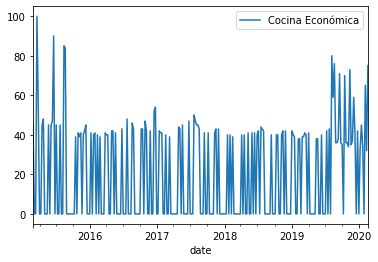

In [40]:
iot[0].plot()

### Con esto, tenemos parametrizado el interés en el estado por cada uno de los giros de comida.
### Ahora, necesitamos revisar el grado de satisfacción de los usuarios por la oferta existente.

# Yelp

### Utilizando la API de Yelp, hacemos búsquedas nuevamente sobre los diferentes giros de comida para encontrar negocios y sus calificaciónes en la plataforma.

In [41]:
client_id = 'JPrLnyol5AaT0XLf7CYbWg'
api_key = '5F0kTJmEIUsrAXKEcpqHA_HvL2uKWA3HZC_iQ73dGgIXgke7fCh84CBP5KpwVMXumfm4BahGo3iaBiNtBi9Q9vexfphH6urta05XSFaaQCs6aphzSQfWwhWSo_6nXHYx'
app_name = 'ravenous'

endpoint = 'https://api.yelp.com/v3/businesses/search?'
req_parameters_1 = ['location']
req_parameters_2 = ['latitud', 'longitude']
optional_parameters = ['term', 'radius', 'categories', 'locale', 'limit', 'sort_by', 'price']

In [89]:
yelp_search = []
for comida in inegi_results:
    term = 'term={}&'.format(comida)
    print(term)
    location = 'latitude=21.073881&longitude=-89.655476&'
    locale = 'locale=es_MX&'
    radius = 'radius=3000&'
    limit = 'limit=50' 
    res = requests.get(endpoint+term+location+locale+radius+limit, headers={'Authorization':'Bearer '+api_key})
    soup = bs(res.content)
    yelp_json = json.loads(soup.findAll('p')[0].text)
    ydf = pd.DataFrame(yelp_json['businesses'])
    ydf['tipo'] = comida
    yelp_search.append(ydf)
    
yelp_search

term=Cocina Económica&
term=Antojitos&
term=Pizza&
term=Hamburguesas&
term=Hot Dogs&
term=Sushi&
term=Tamales&
term=Mariscos&
term=Pescado&
term=Tacos&
term=Carne&
term=Asada&
term=Panuchos&
term=Cochinita&
term=Pollo&
term=Desayunos&
term=Tortas&
term=Mondongo&
term=Empanadas&
term=Chicharronería&
term=Gorditas&
term=Costillas&
term=Grill&
term=Carnitas&
term=Doraditas&
term=Baguettes&
term=Parrilla&
term=Huaraches&
term=Rosticería&
term=China&
term=Yucateca&
term=Tabasqueña&
term=Arrachera&
term=Pastor&
term=Birria&
term=Barbacoa&
term=Pozole&


[Empty DataFrame
 Columns: [tipo]
 Index: [], Empty DataFrame
 Columns: [tipo]
 Index: [],                        id                                          alias  \
 0  39j8D_eznJbJ6_ERzhIWng                              bella-roma-mérida   
 1  DQVZmAV67SIPXOWcfbBfuQ  cafetería-facultad-de-matemáticas-uady-mérida   
 
                                      name  \
 0                              Bella Roma   
 1  Cafetería Facultad De Matemáticas UADY   
 
                                            image_url  is_closed  \
 0  https://s3-media2.fl.yelpcdn.com/bphoto/n5QXPh...      False   
 1  https://s3-media4.fl.yelpcdn.com/bphoto/Y_wxih...      False   
 
                                                  url  review_count  \
 0  https://www.yelp.com.mx/biz/bella-roma-m%C3%A9...             9   
 1  https://www.yelp.com.mx/biz/cafeter%C3%ADa-fac...             3   
 
                                           categories  rating  \
 0  [{'alias': 'italian', 'title': 'Cocina italian.

In [90]:
lugares = pd.concat(yelp_search, axis=0, sort=False)
print(lugares.shape)

(24, 17)


In [91]:
lugares.tipo.value_counts()

Carne           4
Tortas          2
Pizza           2
Hot Dogs        2
Grill           2
Arrachera       2
Hamburguesas    2
Empanadas       1
Doraditas       1
Sushi           1
Pastor          1
Parrilla        1
Tacos           1
Desayunos       1
Asada           1
Name: tipo, dtype: int64

In [92]:
lugares.reset_index(inplace=True)

### La información más relevante que extraemos de Yelp es el 'rating' por giro de comida, por lo que de los resultados sacamos promedios basados en su giro.

In [93]:
ratings = dict(lugares.tipo.value_counts())
for comida in inegi_results:
    ratings[comida] = lugares[lugares.tipo == comida]['rating'].mean()
ratings

{'Carne': 4.625,
 'Tortas': 4.0,
 'Pizza': 4.5,
 'Hot Dogs': 3.75,
 'Grill': 5.0,
 'Arrachera': 4.5,
 'Hamburguesas': 3.75,
 'Empanadas': 4.5,
 'Doraditas': 4.5,
 'Sushi': 4.0,
 'Pastor': 4.0,
 'Parrilla': 5.0,
 'Tacos': 4.0,
 'Desayunos': 3.5,
 'Asada': 5.0,
 'Cocina Económica': nan,
 'Antojitos': nan,
 'Tamales': nan,
 'Mariscos': nan,
 'Pescado': nan,
 'Panuchos': nan,
 'Cochinita': nan,
 'Pollo': nan,
 'Mondongo': nan,
 'Chicharronería': nan,
 'Gorditas': nan,
 'Costillas': nan,
 'Carnitas': nan,
 'Baguettes': nan,
 'Huaraches': nan,
 'Rosticería': nan,
 'China': nan,
 'Yucateca': nan,
 'Tabasqueña': nan,
 'Birria': nan,
 'Barbacoa': nan,
 'Pozole': nan}

In [94]:
yf = pd.concat(yelp_search)
yf.drop(columns = ['alias', 'display_phone', 'location', 'id', 'image_url', 'is_closed', 'phone', 'transactions', 'url'], inplace=True)
yf.head()

/home/linuxbrew/.linuxbrew/Cellar/jupyterlab/1.2.4/libexec/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,categories,coordinates,distance,name,price,rating,review_count,tipo
0,"[{'alias': 'italian', 'title': 'Cocina italian...","{'latitude': 21.0716194744981, 'longitude': -8...",917.867454,Bella Roma,$$,4.5,9.0,Pizza
1,"[{'alias': 'delis', 'title': 'Tortas'}]","{'latitude': 21.048168255592, 'longitude': -89...",3074.036996,Cafetería Facultad De Matemáticas UADY,NaN,4.5,3.0,Pizza
0,"[{'alias': 'burgers', 'title': 'Hamburguesas'}]","{'latitude': 21.0691342629407, 'longitude': -8...",877.738489,Angry Angus Hamburguesas,$,4.0,22.0,Hamburguesas
1,"[{'alias': 'burgers', 'title': 'Hamburguesas'}]","{'latitude': 21.0304604, 'longitude': -89.6354...",2663.760936,Burger Navy,NaN,3.5,3.0,Hamburguesas
0,"[{'alias': 'burgers', 'title': 'Hamburguesas'}]","{'latitude': 21.0691342629407, 'longitude': -8...",877.738489,Angry Angus Hamburguesas,$,4.0,22.0,Hot Dogs


In [95]:
df['YelpRating'] = yf.groupby('tipo').mean().rating
df

,InegiCount,GoogleTrend,YelpRating,score
Index,,,,
Cocina Económica,1379,100,NaN,-0.824000
Antojitos,1027,37,NaN,-1.180006
Pizza,308,100,4.50,-0.033350
Hamburguesas,149,53,3.75,-0.394049
Hot Dogs,36,34,3.75,-0.524995
...,...,...,...,...
Arrachera,4,42,4.50,-0.398901
Pastor,21,88,4.00,0.070772
Birria,2,16,NaN,-0.674784


## Yelp Locations Dataframe

In [96]:
from pandas.io.json import json_normalize
yf.head()

,categories,coordinates,distance,name,price,rating,review_count,tipo
0,"[{'alias': 'italian', 'title': 'Cocina italian...","{'latitude': 21.0716194744981, 'longitude': -8...",917.867454,Bella Roma,$$,4.5,9.0,Pizza
1,"[{'alias': 'delis', 'title': 'Tortas'}]","{'latitude': 21.048168255592, 'longitude': -89...",3074.036996,Cafetería Facultad De Matemáticas UADY,NaN,4.5,3.0,Pizza
0,"[{'alias': 'burgers', 'title': 'Hamburguesas'}]","{'latitude': 21.0691342629407, 'longitude': -8...",877.738489,Angry Angus Hamburguesas,$,4.0,22.0,Hamburguesas
1,"[{'alias': 'burgers', 'title': 'Hamburguesas'}]","{'latitude': 21.0304604, 'longitude': -89.6354...",2663.760936,Burger Navy,NaN,3.5,3.0,Hamburguesas
0,"[{'alias': 'burgers', 'title': 'Hamburguesas'}]","{'latitude': 21.0691342629407, 'longitude': -8...",877.738489,Angry Angus Hamburguesas,$,4.0,22.0,Hot Dogs


In [97]:
json_normalize(yf.coordinates)

,latitude,longitude
0,21.071619,-89.646968
1,21.048168,-89.644594
2,21.069134,-89.648717
3,21.030460,-89.635452
4,21.069134,-89.648717
...,...,...
19,21.048168,-89.644594
20,21.069649,-89.656226
21,21.069134,-89.648717
22,21.057688,-89.643569


In [98]:
#yf.reset_index()
yf[['latitude', 'longitude']] = json_normalize(yf.coordinates)
#yf.drop(columns=['coordinates'], inplace=True)
yf.head()

,categories,coordinates,distance,name,price,rating,review_count,tipo,latitude,longitude
0,"[{'alias': 'italian', 'title': 'Cocina italian...","{'latitude': 21.0716194744981, 'longitude': -8...",917.867454,Bella Roma,$$,4.5,9.0,Pizza,21.071619,-89.646968
1,"[{'alias': 'delis', 'title': 'Tortas'}]","{'latitude': 21.048168255592, 'longitude': -89...",3074.036996,Cafetería Facultad De Matemáticas UADY,NaN,4.5,3.0,Pizza,21.048168,-89.644594
0,"[{'alias': 'burgers', 'title': 'Hamburguesas'}]","{'latitude': 21.0691342629407, 'longitude': -8...",877.738489,Angry Angus Hamburguesas,$,4.0,22.0,Hamburguesas,21.071619,-89.646968
1,"[{'alias': 'burgers', 'title': 'Hamburguesas'}]","{'latitude': 21.0304604, 'longitude': -89.6354...",2663.760936,Burger Navy,NaN,3.5,3.0,Hamburguesas,21.048168,-89.644594
0,"[{'alias': 'burgers', 'title': 'Hamburguesas'}]","{'latitude': 21.0691342629407, 'longitude': -8...",877.738489,Angry Angus Hamburguesas,$,4.0,22.0,Hot Dogs,21.071619,-89.646968


In [99]:
yf[yf.tipo=='Arrachera']

,categories,coordinates,distance,name,price,rating,review_count,tipo,latitude,longitude
0,"[{'alias': 'burgers', 'title': 'Hamburguesas'}]","{'latitude': 21.0691342629407, 'longitude': -8...",877.738489,Angry Angus Hamburguesas,$,4.0,22.0,Arrachera,21.071619,-89.646968
1,"[{'alias': 'argentine', 'title': 'Cocina argen...","{'latitude': 21.0576879626933, 'longitude': -8...",2183.682732,Salamanca Bar & Grill,$$,5.0,4.0,Arrachera,21.048168,-89.644594


In [100]:
df['score'] = df.GoogleTrend/100 - df.YelpRating/5 - df.InegiCount/df.InegiCount.max()
df.sort_values(by='score', ascending=False)

,InegiCount,GoogleTrend,YelpRating,score
Index,,,,
Doraditas,23,100,4.5,0.083321
Pastor,21,88,4.0,0.064772
Desayunos,74,77,3.5,0.016338
Parrilla,19,100,5.0,-0.013778
Pizza,308,100,4.5,-0.123350
...,...,...,...,...
Yucateca,39,100,NaN,NaN
Tabasqueña,11,10,NaN,NaN
Birria,2,16,NaN,NaN


In [101]:
top_yf = df.sort_values(by='score', ascending=False).head().index

top_yf_locs = {}
for top in top_yf:
    print(top)
    print(yf[yf.tipo==top][['latitude', 'longitude']])
    top_yf_locs[top] = yf[yf.tipo==top][['latitude', 'longitude']].head().values
    
top_yf_locs

Doraditas
    latitude  longitude
0  21.071619 -89.646968
Pastor
    latitude  longitude
0  21.071619 -89.646968
Desayunos
    latitude  longitude
0  21.071619 -89.646968
Parrilla
    latitude  longitude
0  21.071619 -89.646968
Pizza
    latitude  longitude
0  21.071619 -89.646968
1  21.048168 -89.644594


{'Doraditas': array([[ 21.07161947, -89.64696829]]),
 'Pastor': array([[ 21.07161947, -89.64696829]]),
 'Desayunos': array([[ 21.07161947, -89.64696829]]),
 'Parrilla': array([[ 21.07161947, -89.64696829]]),
 'Pizza': array([[ 21.07161947, -89.64696829],
        [ 21.04816826, -89.64459381]])}

# Foursquare

In [72]:
import foursquare

client = foursquare.Foursquare(client_id='HVOBXQ5NMUK2AZBCBRSXIBBIFTI1PXKYYMXL2ZG0CIPOTULA', client_secret='BIKGFRQS2FVUM0VN51R5FMIGCRTUYG31BU5IW24CBHSSDNIO')

In [104]:
fs_results = {}
for comida in top_yf_locs.keys():
    print(comida)
    fs_results[comida] = client.venues.search(params={'query': comida, 'intent':'checkin', 'll': '21.073881,-89.655476', 'radius':3000, 'limit':10})
    
fs_results

Doraditas
Pastor
Desayunos
Parrilla
Pizza


{'Doraditas': {'venues': [{'id': '51a28bf2498eae4ec446be41',
    'name': 'Las Doraditas De Las Americas',
    'location': {'address': 'Calle 74',
     'crossStreet': 'Por 59j',
     'lat': 21.063982978119167,
     'lng': -89.64472992976738,
     'labeledLatLngs': [{'label': 'display',
       'lat': 21.063982978119167,
       'lng': -89.64472992976738}],
     'distance': 1568,
     'cc': 'MX',
     'city': 'Mérida',
     'state': 'Yucatán',
     'country': 'México',
     'formattedAddress': ['Calle 74 (Por 59j)', 'Mérida, Yucatán', 'México']},
    'categories': [{'id': '4bf58dd8d48988d1df931735',
      'name': 'BBQ Joint',
      'pluralName': 'BBQ Joints',
      'shortName': 'BBQ',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/bbqalt_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1582848189',
    'hasPerk': False}]},
 'Pastor': {'venues': [{'id': '5afb6ceed807ee002cf2115a',
    'name': 'Pastor Maya',
    'location': {'address': 'Calle 

In [109]:
fs_locs = {}
for result in fs_results:
    result_locs = []
    for i in range(len(fs_results[result]['venues'])):
        loc = []
        loc.append(fs_results[result]['venues'][i]['location']['lat'])
        loc.append(fs_results[result]['venues'][i]['location']['lng'])
        result_locs.append(loc)
    fs_locs[result] = result_locs
    
fs_locs

{'Doraditas': [[21.063982978119167, -89.64472992976738]],
 'Pastor': [[21.069036, -89.647514]],
 'Desayunos': [],
 'Parrilla': [],
 'Pizza': [[21.072228103630664, -89.65542665465934],
  [21.078077, -89.655911],
  [21.07757262145833, -89.65628564357758],
  [21.069292, -89.656364],
  [21.067967, -89.644076],
  [21.068066, -89.644264],
  [21.066053867501815, -89.64446339336273],
  [21.064085, -89.64439],
  [21.047847817354043, -89.64023456826065],
  [21.089666, -89.635986]]}

In [76]:
import folium

mapa=folium.Map(location=[21.073881,-89.655476], tiles='openstreetmap',zoom_start=12)

folium.Circle([21.073881,-89.655476], radius=3000, icon=folium.Icon()).add_to(mapa)
tooltip = 'Click me!'
for coord in fs_locs:
    folium.Marker(coord, popup='<b>Timberline Lodge</b>', tooltip=tooltip).add_to(mapa)
    
import numpy as np
fs_locs_T = np.array(fs_locs).T
avg = [fs_locs_T[0].mean(), fs_locs_T[1].mean()]
avg

folium.Marker(avg, popup='<b>Timberline Lodge</b>', tooltip=tooltip, icon=folium.Icon(color='red', icon='info-sign')).add_to(mapa)

mapa

In [110]:
import folium

mapa=folium.Map(location=[21.073881,-89.655476], tiles='openstreetmap',zoom_start=12)

five_colors = ['red', 'orange', 'lightgreen', 'green', 'blue']
colors = dict(zip(fs_locs.keys(),five_colors))

folium.Circle([21.073881,-89.655476], radius=3000, icon=folium.Icon()).add_to(mapa)

tooltip = 'Click me!'

for key in top_yf_locs:
    for loc in fs_locs[key]:
        #print(key)
        #print(colors[key])
        print(loc)
        folium.Marker(list(loc), popup='<b>'+str(loc)+'</b>', tooltip=key, icon=folium.Icon(color=colors[key], icon='info-sign')).add_to(mapa)
    
mapa

[21.063982978119167, -89.64472992976738]
[21.069036, -89.647514]
[21.072228103630664, -89.65542665465934]
[21.078077, -89.655911]
[21.07757262145833, -89.65628564357758]
[21.069292, -89.656364]
[21.067967, -89.644076]
[21.068066, -89.644264]
[21.066053867501815, -89.64446339336273]
[21.064085, -89.64439]
[21.047847817354043, -89.64023456826065]
[21.089666, -89.635986]


In [78]:
top_yf_locs

{'Baguettes': array([[  21.0036488 ,  -89.5793915 ],
        [  32.5308075 , -116.972847  ],
        [  21.00362394,  -89.62021188],
        [  21.01646535,  -89.56765272],
        [  20.9642601 ,  -89.6130676 ]]),
 'Parrilla': array([[  21.0036488 ,  -89.5793915 ],
        [  32.5308075 , -116.972847  ],
        [  21.00362394,  -89.62021188],
        [  21.01646535,  -89.56765272],
        [  20.9642601 ,  -89.6130676 ]]),
 'Doraditas': array([[  21.0036488 ,  -89.5793915 ],
        [  32.5308075 , -116.972847  ],
        [  21.00362394,  -89.62021188],
        [  21.01646535,  -89.56765272],
        [  20.9642601 ,  -89.6130676 ]]),
 'Yucateca': array([[  21.0036488 ,  -89.5793915 ],
        [  32.5308075 , -116.972847  ],
        [  21.00362394,  -89.62021188],
        [  21.01646535,  -89.56765272],
        [  20.9642601 ,  -89.6130676 ]]),
 'Pastor': array([[  21.0036488 ,  -89.5793915 ],
        [  32.5308075 , -116.972847  ],
        [  21.00362394,  -89.62021188],
        [  2

# Análisis Final

### Ahora hace falta integrar toda la información.

### Primero revisamos la oferta con los datos del Inegi, y lo dejamos en términos porcentuales para conocer cómo están distribuidos los giros de comida.

In [84]:
yinegi['ratings'] = yinegi['nom_estab'].apply(lambda x: ratings[x])
yinegi.columns

/home/linuxbrew/.linuxbrew/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Index(['id', 'nom_estab', 'raz_social', 'nombre_act', 'per_ocu', 'tipo_vial',
       'cod_postal', 'tipoUniEco', 'latitud', 'longitud', 'fecha_alta',
       'trend', 'ratings'],
      dtype='object')

In [99]:
analysis = pd.DataFrame()
analysis['qty'] = yinegi['nom_estab'].value_counts()
analysis

,qty
cocina económica,1329
tacos,665
antojitos,506
lonchería,500
pizza,326
restaurante,325
pollo,217
panuchos,180
mariscos,127
tortas,112


In [100]:
analysis['percentage'] = analysis.qty.apply(lambda x: x*100/analysis.qty.sum())
analysis

,qty,percentage
cocina económica,1329,27.849958
tacos,665,13.935457
antojitos,506,10.603521
lonchería,500,10.477787
pizza,326,6.831517
restaurante,325,6.810562
pollo,217,4.547360
panuchos,180,3.772003
mariscos,127,2.661358
tortas,112,2.347024


### Luego, integramos la información de Yelp, sobre el grado de satisfacción con la oferta existente.

In [105]:
ratings

{'pollo': 4.13,
 'desayunos': 4.33,
 'tacos': 4.33,
 'tortas': 4.12,
 'cocina económica': 4.14,
 'carne asada': 4.06,
 'pizza': 4.08,
 'arracheras': 4.05,
 'restaurante': 4.5,
 'mariscos': 4.23,
 'antojitos': 4.026315789473684,
 'cochinita': 4.194444444444445,
 'tamales': 4.145161290322581,
 'sushi': 4.048387096774194,
 'panuchos': 3.9,
 'carnitas': 4.318181818181818,
 'lonchería': 4.0476190476190474,
 'hot dogs': 4.194444444444445,
 'chicharronería': 4.333333333333333}

In [116]:
analysis = pd.concat([analysis, pd.Series(ratings)], axis=1)

/home/linuxbrew/.linuxbrew/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [119]:
analysis.rename(columns = {0:'rating'}, inplace=True)
analysis

,qty,percentage,rating
antojitos,506,10.603521,4.026316
arracheras,3,0.062867,4.050000
carne asada,71,1.487846,4.060000
carnitas,33,0.691534,4.318182
chicharronería,69,1.445935,4.333333
cochinita,104,2.179380,4.194444
cocina económica,1329,27.849958,4.140000
desayunos,70,1.466890,4.330000
hot dogs,17,0.356245,4.194444
lonchería,500,10.477787,4.047619


### También integramos la información de Google Trends sobre el interés de los consumidores por cada uno de los giros de comida.

In [120]:
trends

cocina económica    100
panuchos            100
pizza               100
cochinita            88
pollo                79
desayunos            77
tamales              54
carnitas             42
restaurante          39
antojitos            37
arracheras           34
carne asada          32
mariscos             31
sushi                30
hot dogs             29
tacos                22
tortas               22
chicharronería        0
lonchería             0
Name: Yucatán, dtype: int64

In [121]:
analysis = pd.concat([analysis, trends], axis=1)

/home/linuxbrew/.linuxbrew/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [123]:
analysis.rename(columns = {'Yucatán': 'trend'}, inplace=True)
analysis

,qty,percentage,rating,trend
antojitos,506,10.603521,4.026316,37
arracheras,3,0.062867,4.050000,34
carne asada,71,1.487846,4.060000,32
carnitas,33,0.691534,4.318182,42
chicharronería,69,1.445935,4.333333,0
cochinita,104,2.179380,4.194444,88
cocina económica,1329,27.849958,4.140000,100
desayunos,70,1.466890,4.330000,77
hot dogs,17,0.356245,4.194444,29
lonchería,500,10.477787,4.047619,0


## Decisión 

### Para decidir el giro del negocio de comida, se toman las siguientes consideraciones:
#### 1. Se prefiere un giro con alto interés (trend).
#### 2. Se prefiere un giro con baja satisfacción por la población, por ser área de oportunidad. (rating)
#### 3. Conviene un giro con poca oferta, pues significa menor competencia. (percentage)

### Fórmula utilizada
$$score = \frac{trend}{20*rating}$$

In [141]:
analysis['score'] = analysis['trend'] / (100 * analysis['rating']/5)
analysis.sort_values('score', ascending=False).head()

,qty,percentage,rating,trend,score
panuchos,180,3.772003,3.900000,100,1.282051
pizza,326,6.831517,4.080000,100,1.225490
cocina económica,1329,27.849958,4.140000,100,1.207729
cochinita,104,2.179380,4.194444,88,1.049007
pollo,217,4.547360,4.130000,79,0.956416


### Indudablemente, conviene poner un restaurante de panuchos. Because yucas.